In [1]:
from igraph import *

In [82]:
class Grafo:
    # função que define estrutura do grafo
    def __init__(self, V, E):
        self.V = V
        self.E = set(frozenset((u,v)) for u,v in E)
        self._vizinhos = {}
        
        # adiciona vertice para cada V passado como argumento da classe
        for v in V:
            self.adiciona_vertice(v)

        # adiciona todas arestas em E passado como argumento da classe
        for u,v in self.E:
            self.adiciona_aresta(u,v)
    
    # adicona novo vertice
    def adiciona_vertice(self, v):
        # adiciona se ainda não existe vertive no Grafo
        if v not in self._vizinhos:
            self._vizinhos[v] = set()

    # adiciona nova aresta
    def adiciona_aresta(self, u, v):
        # adiciona vertices caso u ou v não exista
        self.adiciona_vertice(u)
        self.adiciona_vertice(v)

        # adiciona o conjunto de arestas em E
        self.E.add(frozenset([u,v]))
        self._vizinhos[u].add(v)
        self._vizinhos[v].add(u)

    # adiciona aresta direcionada
    def adiciona_aresta_direcionada(self, u, v):
        # adiciona vertices caso u ou v não exista
        self.adiciona_vertice(u)
        self.adiciona_vertice(v)

        # adiciona o conjunto de arestas em E
        self.E.add(frozenset([u,v]))
        self._vizinhos[u].add(v)
    
    # apaga aresta
    def apaga_aresta(self, u, v):
        e = frozenset([u,v]) 

        # verifica se existe conjunto de arestas em E
        if e in self.E:
            self.E.remove(e)
            self._vizinhos[u].remove(v)
            self._vizinhos[v].remove(u)
    
    # Apaga vertice e arestas que ele tinha com outros nós
    def apaga_vertice(self, u):
        para_apagar = list(self.vizinhos(u))
        # apaga todas arestas de u
        for v in para_apagar:
            self.apaga_aresta(u,v)
        del self._vizinhos[u]
    
    # verifica se aresta existe no Grafo
    def existe_aresta(self, u, v):
        e = frozenset([u,v])
        # verifica se conjunto existe em E, caso exista ele retorna True, caso contrario retorna falso
        if e in self.E:
            return True
        else:
            return False

    # retorna grau de um vertice
    def deg(self, v):
        return len(self._vizinhos[v])

    # retorna vizinhos de v
    def vizinhos(self, v):
        return iter(self._vizinhos[v])

    # quantidade de arestas no Grafo
    @property
    def m(self):
        return len(self.E)
    
    @property
    def n(self):
        return len(self._vizinhos)    
    
    def BFS(self):
        G_aux = Grafo(self.V, {})
        
        nao_visitado = self.V
        queue = []
        
        for s in nao_visitado:
            nao_visitado.remove(s)
            queue.append(s)
            
            while(queue):
                u = queue.pop(0)
                
                for v in list(self.vizinhos(u)):
                    if(v in nao_visitado):
                        G_aux.adiciona_aresta(u,v)
                        nao_visitado.remove(v)
                        queue.append(v)
        return G_aux
        
    


In [84]:
#inicializando grafo 
G = Grafo([1,2,3,4,5,6,7,8,9,10,11], {(1,2),(2,3),(3,4),(3,5),(4,8),(5,6),(6,7),(7,8),(7,9),(9,11),(11,10),(10,8)})
G1 = G.BFS()

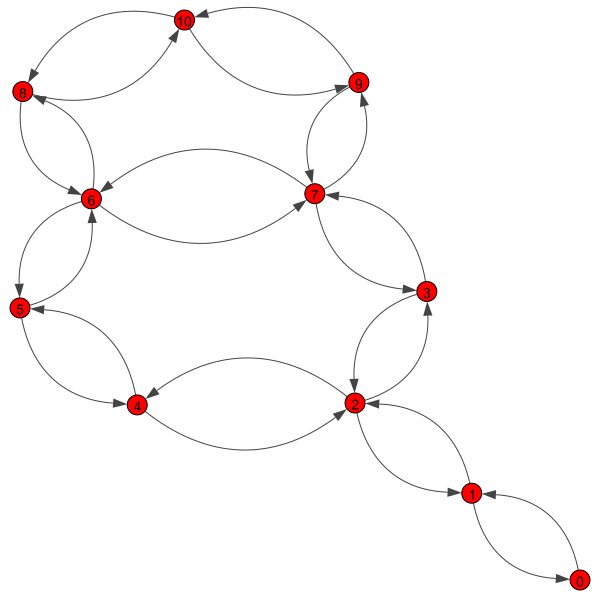

In [90]:
g = Graph(directed = True)
g1 = Graph(directed = True)

lista = []
lista1 = []

g.add_vertices(range(G.n))
g1.add_vertices(range(G1.n))

for i in range(G.n):
    lista = list(G.vizinhos(i+1))
    for j in lista:
        g.add_edges([(i,j-1)])
        
for i in range(G1.n):
    lista = list(G1.vizinhos(i+1))
    for j in lista:
        g1.add_edges([(i,j-1)])
        
for i in range(len(g.vs)):
    g.vs[i]["id"]= i
    g.vs[i]["label"]= str(i)
    
for i in range(len(g1.vs)):
    g1.vs[i]["id"]= i
    g1.vs[i]["label"]= str(i)    

    
plot(g)


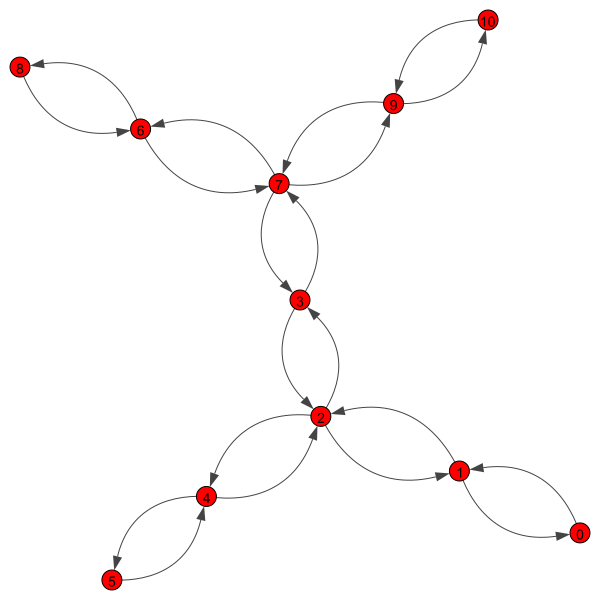

In [91]:
plot(g1)